In [1]:
import pandas as p
from pandas import DataFrame
import numpy as n
import matplotlib.pyplot as m
import math as math
n.random.seed(6)
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [17]:
df = p.read_csv("Iris_DataSet.csv")
print(df)
df = df.drop(['No'],axis=1)
Y = []
target = df['Species']
for val in target:
    if(val == 'I. setosa'):
        Y.append(-1)
    else:
        Y.append(1)
df = df.drop(['Species'],axis=1)
X = df.values.tolist()

     No  Sepal Length  Sepal Width  Petal Length  Petal Width        Species
0     1           5.1          3.5           1.4          0.2      I. setosa
1     2           4.9          3.0           1.4          0.2      I. setosa
2     3           4.7          3.2           1.3          0.2      I. setosa
3     4           4.6          3.1           1.5          0.2      I. setosa
4     5           5.0          3.6           1.4          0.3      I. setosa
5     6           5.4          3.9           1.7          0.4      I. setosa
6     7           4.6          3.4           1.4          0.3      I. setosa
7     8           5.0          3.4           1.5          0.2      I. setosa
8     9           4.4          2.9           1.4          0.2      I. setosa
9    10           4.9          3.1           1.5          0.1      I. setosa
10   11           5.4          3.7           1.5          0.2      I. setosa
11   12           4.8          3.4           1.6          0.2      I. setosa

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

x_train = n.asmatrix(x_train)
x_test =  n.asmatrix(x_test)
y_train = n.asmatrix(y_train)
y_test =  n.asmatrix(y_test)

y_train = y_train.reshape(y_train.shape[1],1)


rows = n.size(x_train,0)
cols = n.size(x_train,1)

print("Rows:" , rows , "Cols : ",cols)

itr = 1
eta = 0.001
alpha = n.asmatrix(n.random.random_sample((rows,1)))


Rows: 70 Cols :  4


In [19]:
for itr in range(100):
    i = int(n.random.rand(1)* rows)
    sm = 0
    for j in range(rows):
        sm += alpha[j] * y_train[j] * y_train[i] * (x_train[j] * x_train[i].T)
        
    grad = 1 - sm
    alpha[i] += eta * grad
    alpha[i] = max(min(alpha[i],10),0)
    j = int(n.random.rand(1)* rows)
    sm2 = 0
    for k in range(rows):
        if j != k:
            sm2 += alpha[k]*y_train[k]
    alpha[j] = -y_train[j] * sm2
    alpha[j] = max(min(alpha[j],10),0)

In [20]:
w = n.asmatrix(n.zeros(cols))
for j in range(rows):
    w+= alpha[j]*y_train[j]*x_train[j]
    
print(w)


[[15.90477714 -8.26055269 41.9014581  15.68790449]]


In [21]:
negsup = 100000000
pozsup = 100000000
for k in range(rows):
    if y_train[k] == 1:
        if w * x_train[k].T < negsup:
            re = w * x_train[k].T
            indneg = k
    else:
        if w * x_train[k].T < pozsup:
            re = w * x_train[k].T
            indpoz = k

b = -0.5*( w*x_train[indneg].T + w*x_train[indpoz].T )

In [22]:
def compute(W, b, x_test_a ):
    compute = n.dot(x_test_a,W.T) + b.T
    sign = n.copy(compute)
    compute[sign < 0] = -1
    compute[sign > 0] = 1
    return compute

In [23]:
predict_Y = compute(w,b,x_test)
predict_Y = n.squeeze( n.asarray(predict_Y) )
Y = n.squeeze(n.asarray(y_test))

res=n.zeros(n.size(x_test,0))
acc=0
for k in range(len(predict_Y)):
    if predict_Y[k] == Y[k]:
        acc+=1
acc=acc/30
print(acc*100,"% is the acc")

100.0 % is the acc


**************** Prediction using SEPAL LENGTH & WIDTH **********************


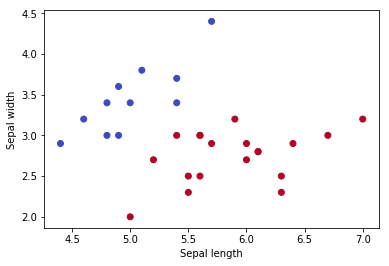

**************** Prediction using PETAL LENGTH & WIDTH **********************


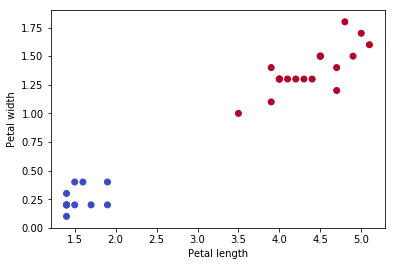

In [24]:
X = n.squeeze(n.asarray(x_test))

print("**************** Prediction using SEPAL LENGTH & WIDTH **********************")
y = n.squeeze(n.asarray(predict_Y))
m.scatter(X[:, 0], X[:, 1], c=y, cmap=m.cm.coolwarm)
m.xlabel('Sepal length')
m.ylabel('Sepal width')
m.show()

print("**************** Prediction using PETAL LENGTH & WIDTH **********************")
y = n.squeeze(n.asarray(predict_Y))
m.scatter(X[:, 2], X[:, 3], c=y, cmap=m.cm.coolwarm)
m.xlabel('Petal length')
m.ylabel('Petal width')
m.show()